<a href="https://colab.research.google.com/github/FGomez935/phMRIThesis/blob/main/GaussianProcess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import torch
import gpytorch
from matplotlib import pyplot as plt
from scipy.stats import norm

In [ ]:
data= np.load("/content/Aggregated_dataset_converted.npy", allow_pickle=True)
df = pd.DataFrame(data)

# Identify rows with NaNs in %changeHR
nan_rows = df[df['%changeHR'].isna()]

# Replace NaNs based on matching Session and Mask
for index, row in nan_rows.iterrows():
   session = row['Session']
   mask = row['Mask']
   # Find a row with the same Session and Mask and a non-NaN %changeHR
   reference_rows = df[(df['Session'] == session) & (df['Mask'] == mask) & (df['%changeHR'].notna())]

   if not reference_rows.empty:
    # Get the first row with the same Session and Mask and a non-NaN %changeHR
    reference_row = reference_rows.iloc[0]
    # Replace the NaN in this row with the %changeHR value from the reference row
    df.loc[index, '%changeHR'] = reference_row['%changeHR']

# Print the DataFrame after replacing NaNs
print("DataFrame with NaNs in %changeHR replaced:")
print(df)

DataFrame with NaNs in %changeHR replaced:
     Session          Mask SubjectID  \
0       High  ACC_mask.nii        33   
1    Placebo  ACC_mask.nii        33   
2        Low  ACC_mask.nii        36   
3    Placebo  ACC_mask.nii         6   
4       High  ACC_mask.nii         3   
..       ...           ...       ...   
405     High  PCC_mask.nii        23   
406  Placebo  PCC_mask.nii        35   
407     High  PCC_mask.nii        25   
408     High  PCC_mask.nii        14   
409  Placebo  PCC_mask.nii         8   

                                            TimeCourse  \
0    [-1.9683935098297107, -0.8794252679081556, 0.7...   
1    [0.013833803606089158, 0.35618685424523355, -0...   
2    [0.03729551926550522, 0.5832213853278596, 0.16...   
3    [0.6021688128812214, 0.4645021239350509, -0.14...   
4    [0.8153549897052282, 0.552580064434198, 0.4153...   
..                                                 ...   
405  [0.07225854657220417, -0.421061973923787, -0.7...   
406  [0.2942

In [ ]:
# Create exploded DataFrame
exploded_df = df.explode('TimeCourse', ignore_index=True)
exploded_df['%changeHR'] = df['%changeHR'].explode(ignore_index=True)

# Creating a 'timeseries' column that counts from 0 to 431 across the rows
exploded_df['timeseries'] = np.arange(len(exploded_df)) % 432

In [ ]:
# Create exploded DataFrame
exploded_df = df.explode('TimeCourse', ignore_index=True)
exploded_df['%changeHR'] = df['%changeHR'].explode(ignore_index=True)

# Creating a 'timeseries' column that counts from 0 to 431 across the rows
exploded_df['timeseries'] = np.arange(len(exploded_df)) % 432

Difference Model - Iteration 1/200 - Loss: 1.2901530265808105
Difference Model - Iteration 11/200 - Loss: 0.8969893455505371
Difference Model - Iteration 21/200 - Loss: 0.4484582245349884
Difference Model - Iteration 31/200 - Loss: -0.017170028761029243
Difference Model - Iteration 41/200 - Loss: -0.46523764729499817
Difference Model - Iteration 51/200 - Loss: -0.8677892088890076
Difference Model - Iteration 61/200 - Loss: -1.2003731727600098
Difference Model - Iteration 71/200 - Loss: -1.506320834159851
Difference Model - Iteration 81/200 - Loss: -1.7476534843444824
Difference Model - Iteration 91/200 - Loss: -1.9135159254074097
Difference Model - Iteration 101/200 - Loss: -2.022299289703369
Difference Model - Iteration 111/200 - Loss: -2.0936119556427
Difference Model - Iteration 121/200 - Loss: -2.142904758453369
Difference Model - Iteration 131/200 - Loss: -2.17832088470459
Difference Model - Iteration 141/200 - Loss: -2.2050533294677734
Difference Model - Iteration 151/200 - Loss:

/usr/local/lib/python3.10/dist-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(


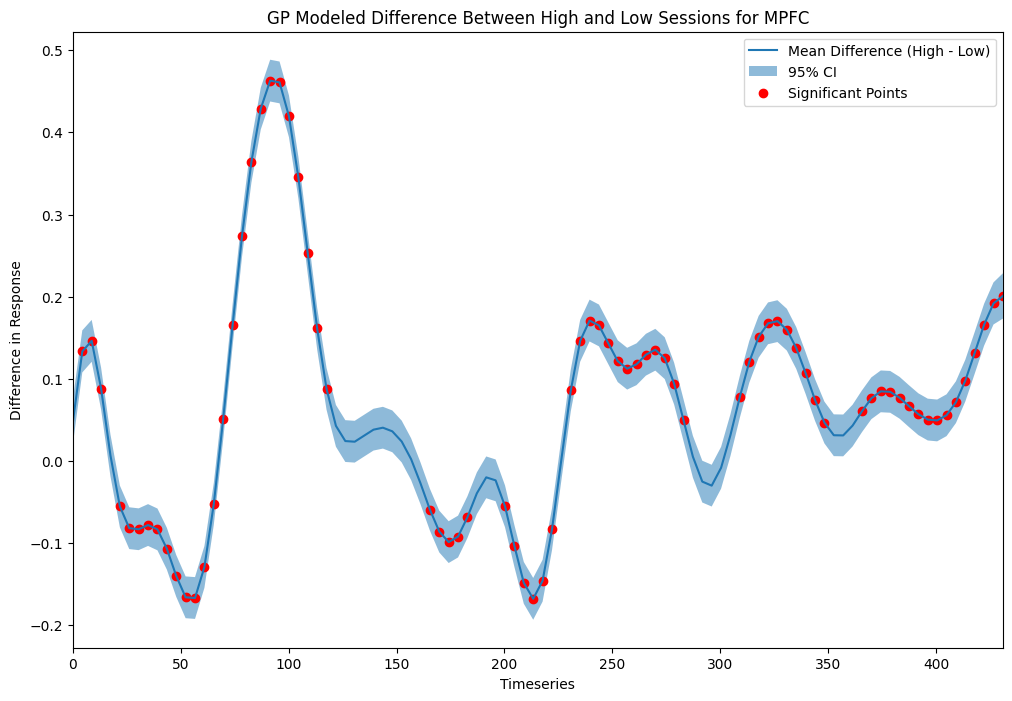

Difference Model - Iteration 1/200 - Loss: 1.2864645719528198
Difference Model - Iteration 11/200 - Loss: 0.8887939453125
Difference Model - Iteration 21/200 - Loss: 0.42817050218582153
Difference Model - Iteration 31/200 - Loss: -0.06809066981077194
Difference Model - Iteration 41/200 - Loss: -0.5707591772079468
Difference Model - Iteration 51/200 - Loss: -1.0735918283462524
Difference Model - Iteration 61/200 - Loss: -1.534443974494934
Difference Model - Iteration 71/200 - Loss: -1.9030280113220215
Difference Model - Iteration 81/200 - Loss: -2.1865811347961426
Difference Model - Iteration 91/200 - Loss: -2.3844213485717773
Difference Model - Iteration 101/200 - Loss: -2.506565570831299
Difference Model - Iteration 111/200 - Loss: -2.583683729171753
Difference Model - Iteration 121/200 - Loss: -2.635946750640869
Difference Model - Iteration 131/200 - Loss: -2.673680305480957
Difference Model - Iteration 141/200 - Loss: -2.702457904815674
Difference Model - Iteration 151/200 - Loss: -

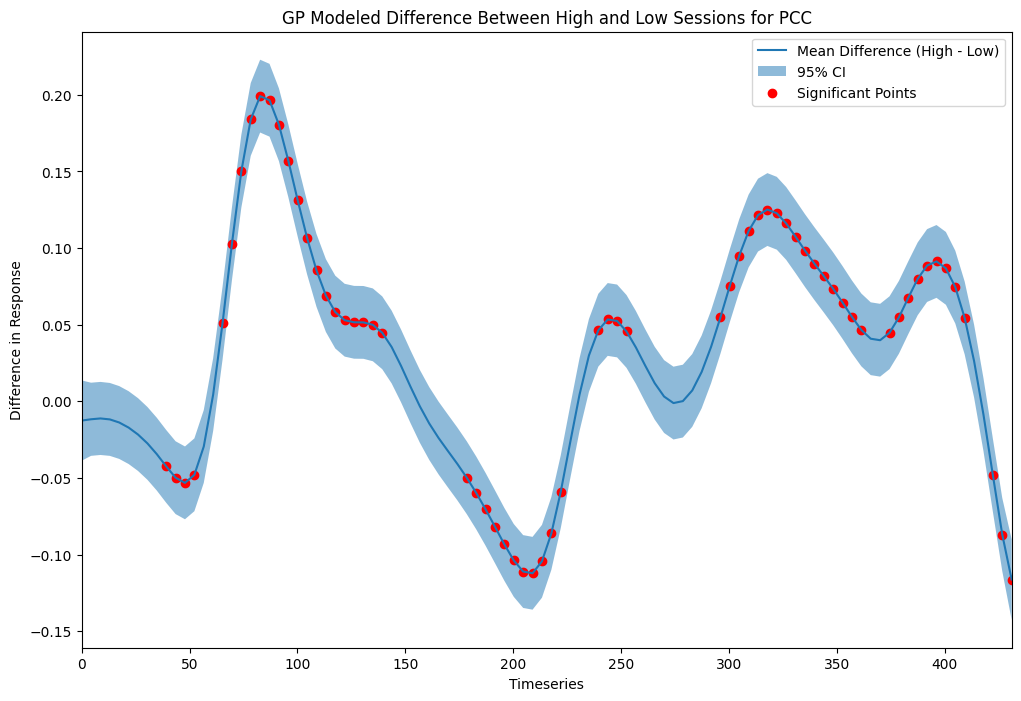

Difference Model - Iteration 1/200 - Loss: 1.286012887954712
Difference Model - Iteration 11/200 - Loss: 0.8877911567687988
Difference Model - Iteration 21/200 - Loss: 0.4257088005542755
Difference Model - Iteration 31/200 - Loss: -0.07432029396295547
Difference Model - Iteration 41/200 - Loss: -0.5848427414894104
Difference Model - Iteration 51/200 - Loss: -1.100743055343628
Difference Model - Iteration 61/200 - Loss: -1.5878665447235107
Difference Model - Iteration 71/200 - Loss: -1.9754773378372192
Difference Model - Iteration 81/200 - Loss: -2.2483277320861816
Difference Model - Iteration 91/200 - Loss: -2.427391290664673
Difference Model - Iteration 101/200 - Loss: -2.5339300632476807
Difference Model - Iteration 111/200 - Loss: -2.595560312271118
Difference Model - Iteration 121/200 - Loss: -2.634122848510742
Difference Model - Iteration 131/200 - Loss: -2.6600847244262695
Difference Model - Iteration 141/200 - Loss: -2.678734540939331
Difference Model - Iteration 151/200 - Loss:

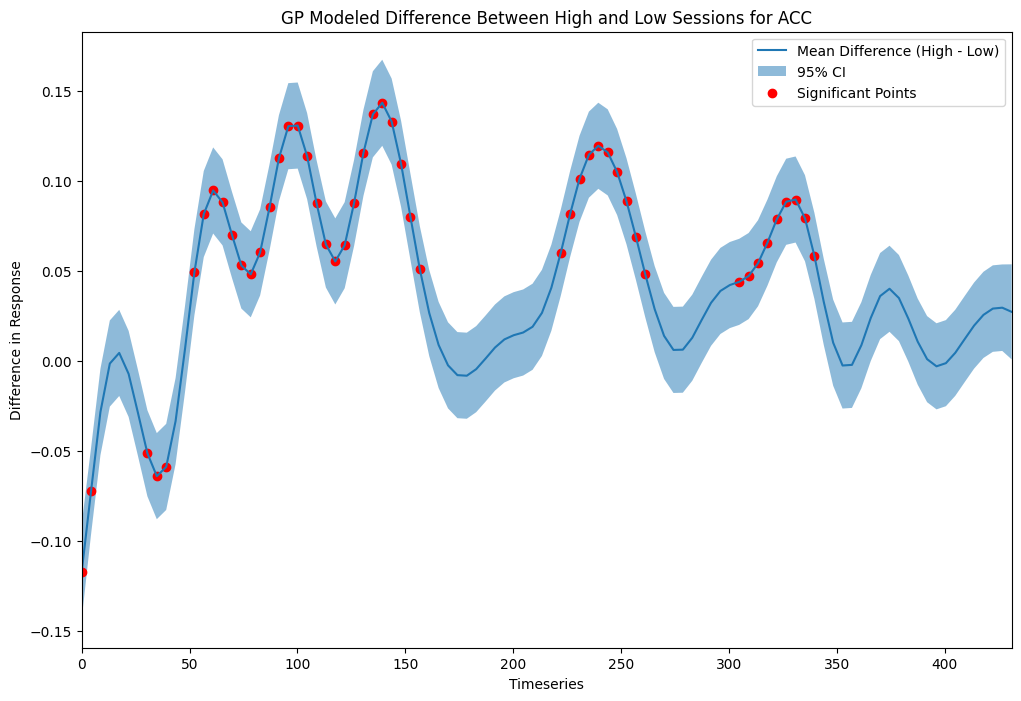

Difference Model - Iteration 1/200 - Loss: 1.2861113548278809
Difference Model - Iteration 11/200 - Loss: 0.8880097270011902
Difference Model - Iteration 21/200 - Loss: 0.4262451231479645
Difference Model - Iteration 31/200 - Loss: -0.07294967770576477
Difference Model - Iteration 41/200 - Loss: -0.5815653204917908
Difference Model - Iteration 51/200 - Loss: -1.0940124988555908
Difference Model - Iteration 61/200 - Loss: -1.5735763311386108
Difference Model - Iteration 71/200 - Loss: -1.9537042379379272
Difference Model - Iteration 81/200 - Loss: -2.227602481842041
Difference Model - Iteration 91/200 - Loss: -2.410508632659912
Difference Model - Iteration 101/200 - Loss: -2.517746686935425
Difference Model - Iteration 111/200 - Loss: -2.579408884048462
Difference Model - Iteration 121/200 - Loss: -2.6176598072052
Difference Model - Iteration 131/200 - Loss: -2.6430981159210205
Difference Model - Iteration 141/200 - Loss: -2.6612212657928467
Difference Model - Iteration 151/200 - Loss: 

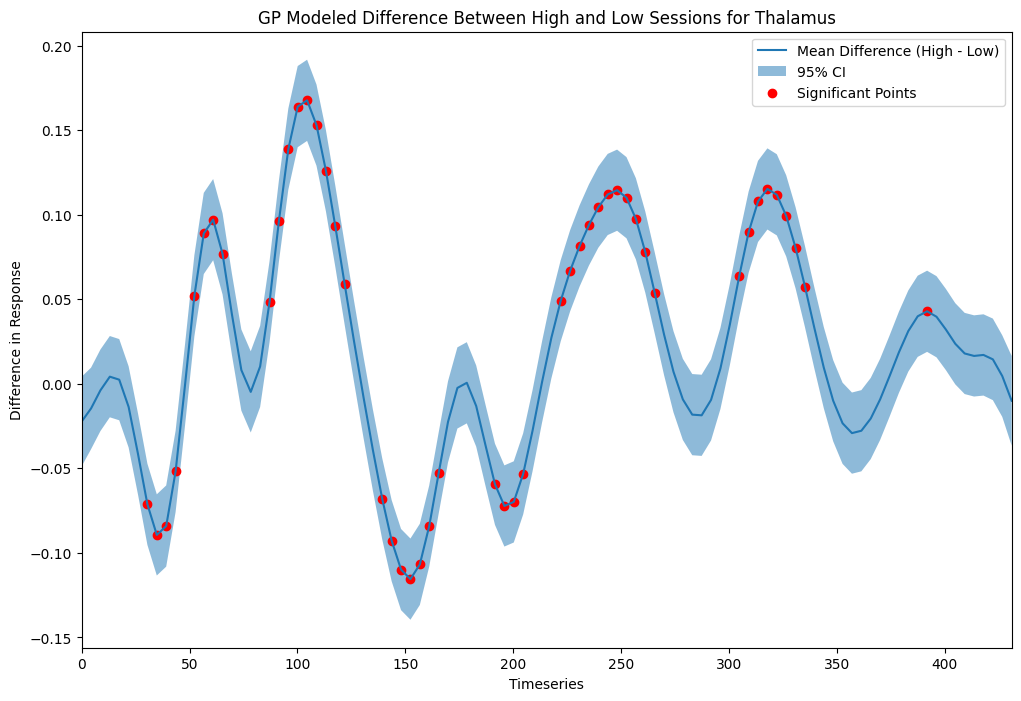

Difference Model - Iteration 1/200 - Loss: 1.2856738567352295
Difference Model - Iteration 11/200 - Loss: 0.887037992477417
Difference Model - Iteration 21/200 - Loss: 0.42384737730026245
Difference Model - Iteration 31/200 - Loss: -0.07913627475500107
Difference Model - Iteration 41/200 - Loss: -0.5966663360595703
Difference Model - Iteration 51/200 - Loss: -1.126178503036499
Difference Model - Iteration 61/200 - Loss: -1.646425485610962
Difference Model - Iteration 71/200 - Loss: -2.0849437713623047
Difference Model - Iteration 81/200 - Loss: -2.3991293907165527
Difference Model - Iteration 91/200 - Loss: -2.594043493270874
Difference Model - Iteration 101/200 - Loss: -2.709944248199463
Difference Model - Iteration 111/200 - Loss: -2.7794501781463623
Difference Model - Iteration 121/200 - Loss: -2.8239028453826904
Difference Model - Iteration 131/200 - Loss: -2.8549792766571045
Difference Model - Iteration 141/200 - Loss: -2.8779876232147217
Difference Model - Iteration 151/200 - Los

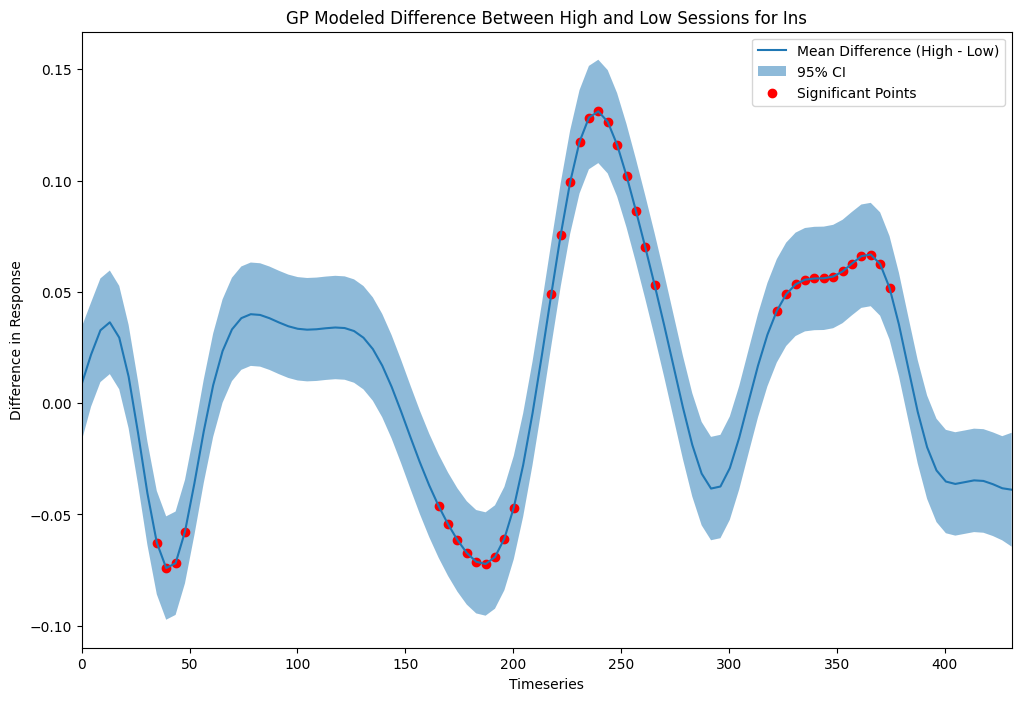

In [ ]:
# Define the GP model class (as previously defined)
class GPDifferenceModel(gpytorch.models.ExactGP):
    def __init__(self, train_x, train_y, likelihood):
        super(GPDifferenceModel, self).__init__(train_x, train_y, likelihood)
        self.mean_module = gpytorch.means.ZeroMean()
        self.covar_module = gpytorch.kernels.ScaleKernel(
            gpytorch.kernels.RBFKernel() + gpytorch.kernels.MaternKernel(nu=1.5)
        )

    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

# Iterate through each timecourse and create plots
for key in time_courses:
    if 'session_Low' in key:
        session_name = key.split('_')[3]  # Extract session name (Low)
        mask_name = key.split('_')[2]  # Extract mask name (Thalamus)

        # Assuming a corresponding 'High' session exists
        high_key = key.replace('Low', 'High')
        if high_key in time_courses:
            # Extract time series data
            time_series_low = time_courses[key]
            time_series_high = time_courses[high_key]

            # Compute the difference
            difference = time_series_high - time_series_low

            # Convert to torch tensors
            train_x = torch.tensor(np.linspace(0, 431, len(time_series_low)), dtype=torch.float32)
            train_y = torch.tensor(difference, dtype=torch.float32)

            # Define the GP model for the difference
            likelihood = gpytorch.likelihoods.GaussianLikelihood()
            model_diff = GPDifferenceModel(train_x, train_y, likelihood)

            # Train the GP model
            model_diff.train()
            likelihood.train()
            optimizer = torch.optim.Adam(model_diff.parameters(), lr=0.1)
            mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model_diff)

            training_iterations = 200
            loss_values = []
            for i in range(training_iterations):
                optimizer.zero_grad()
                output = model_diff(train_x)
                loss = -mll(output, train_y)
                loss.backward()
                optimizer.step()
                loss_values.append(loss.item())
                if i % 10 == 0 or i == training_iterations - 1:
                    print(f"Difference Model - Iteration {i + 1}/{training_iterations} - Loss: {loss.item()}")

            # Evaluate the model
            model_diff.eval()
            likelihood.eval()
            with torch.no_grad(), gpytorch.settings.fast_pred_var():
                observed_pred_diff = likelihood(model_diff(train_x))

            # Extract the mean and variance predictions for the difference
            mean_diff = observed_pred_diff.mean.numpy()
            var_diff = observed_pred_diff.variance.numpy()

            # Check if the difference is significantly different from zero
            z_scores = mean_diff / np.sqrt(var_diff)
            p_values = 2 * (1 - norm.cdf(np.abs(z_scores)))

            # Apply Bonferroni correction
            alpha = 0.05
            corrected_alpha = alpha / len(p_values)
            significant_points = np.where(p_values < corrected_alpha)[0]

            # Plot the results
            plt.figure(figsize=(12, 8))
            plt.plot(train_x.numpy(), mean_diff, label='Mean Difference (High - Low)')
            plt.fill_between(train_x.numpy(), mean_diff - 1.96 * np.sqrt(var_diff), mean_diff + 1.96 * np.sqrt(var_diff), alpha=0.5, label='95% CI')
            plt.scatter(train_x.numpy()[significant_points], mean_diff[significant_points], color='red', label='Significant Points')
            plt.xlim(0, 431)
            plt.title(f'GP Modeled Difference Between High and Low Sessions for {mask_name}')
            plt.xlabel('Timeseries')
            plt.ylabel('Difference in Response')
            plt.legend()
            plt.show()


/usr/local/lib/python3.10/dist-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(


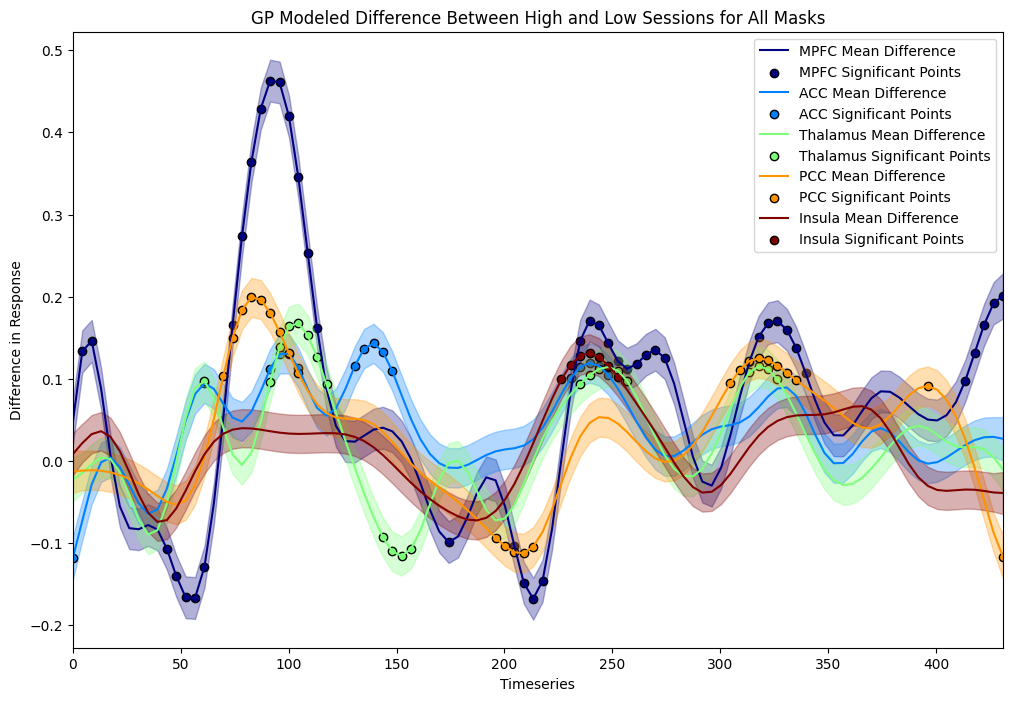

In [ ]:
# Define the GP model class (as previously defined)
class GPDifferenceModel(gpytorch.models.ExactGP):
    def __init__(self, train_x, train_y, likelihood):
        super(GPDifferenceModel, self).__init__(train_x, train_y, likelihood)
        self.mean_module = gpytorch.means.ZeroMean()
        self.covar_module = gpytorch.kernels.ScaleKernel(
            gpytorch.kernels.RBFKernel() + gpytorch.kernels.MaternKernel(nu=1.5)
        )

    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

# Extract mask names and session types
mask_names = set()
for key in time_courses:
    parts = key.split('_')
    mask_names.add(parts[2])

mask_names_real = (["MPFC", "ACC", "Thalamus", "PCC", "Insula"])

# Color map for different masks
colors = plt.cm.jet(np.linspace(0, 1, len(mask_names)))

# Set up the figure for combined plot
plt.figure(figsize=(12, 8))

# Iterate through each timecourse and generate GPs
for idx, mask_name in enumerate(mask_names):
    # Extract time series data for Low and High sessions
    low_key = f'timecourse_mask_{mask_name}_session_Low'
    high_key = f'timecourse_mask_{mask_name}_session_High'

    if low_key in time_courses and high_key in time_courses:
        time_series_low = time_courses[low_key]
        time_series_high = time_courses[high_key]

        # Compute the difference
        difference = time_series_high - time_series_low

        # Convert to torch tensors
        train_x = torch.tensor(np.linspace(0, 431, len(time_series_low)), dtype=torch.float32)
        train_y = torch.tensor(difference, dtype=torch.float32)

        # Define the GP model for the difference
        likelihood = gpytorch.likelihoods.GaussianLikelihood()
        model_diff = GPDifferenceModel(train_x, train_y, likelihood)

        # Train the GP model
        model_diff.train()
        likelihood.train()
        optimizer = torch.optim.Adam(model_diff.parameters(), lr=0.1)
        mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model_diff)

        training_iterations = 200
        for i in range(training_iterations):
            optimizer.zero_grad()
            output = model_diff(train_x)
            loss = -mll(output, train_y)
            loss.backward()
            optimizer.step()

        # Evaluate the model
        model_diff.eval()
        likelihood.eval()
        with torch.no_grad(), gpytorch.settings.fast_pred_var():
            observed_pred_diff = likelihood(model_diff(train_x))

        # Extract the mean and variance predictions for the difference
        mean_diff = observed_pred_diff.mean.numpy()
        var_diff = observed_pred_diff.variance.numpy()

        # Check if the difference is significantly different from zero
        z_scores = mean_diff / np.sqrt(var_diff)
        p_values = 2 * (1 - norm.cdf(np.abs(z_scores)))

        # Apply Bonferroni correction
        alpha = 0.05
        corrected_alpha = alpha / len(p_values)
        significant_points = np.where(p_values < corrected_alpha)[0]

        # Plot the results for this mask
        plt.plot(train_x.numpy(), mean_diff, label=f'{mask_names_real[idx]} Mean Difference', color=colors[idx])
        plt.fill_between(train_x.numpy(), mean_diff - 1.96 * np.sqrt(var_diff), mean_diff + 1.96 * np.sqrt(var_diff), alpha=0.3, color=colors[idx])
        plt.scatter(train_x.numpy()[significant_points], mean_diff[significant_points], color=colors[idx], edgecolor='black', label=f'{mask_names_real[idx]} Significant Points')

# Add legend and labels
plt.title('GP Modeled Difference Between High and Low Sessions for All Masks')
plt.xlabel('Timeseries')
plt.ylabel('Difference in Response')
plt.legend()
plt.xlim(0, 431)
plt.show()